# INFORME ESTADISTICO

## Importar bibliotecas

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los parquets

In [2]:
green = pl.read_parquet("green_tripdata_2025-01.parquet")
yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
fhv = pl.read_parquet("fhv_tripdata_2025-01.parquet")
fhvhv = pl.read_parquet("fhvhv_tripdata_2025-01.parquet")


### Verificar el nombre de las columnas

In [6]:
green.columns
yellow.columns
fhv.columns
fhvhv.columns

['hvfhs_license_num',
 'dispatching_base_num',
 'originating_base_num',
 'request_datetime',
 'on_scene_datetime',
 'pickup_datetime',
 'dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay',
 'shared_request_flag',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_request_flag',
 'wav_match_flag',
 'cbd_congestion_fee']

In [7]:
green

VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
i32,datetime[μs],datetime[μs],str,i64,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64
2,2025-01-01 00:03:01,2025-01-01 00:17:12,"""N""",1,75,235,1,5.93,24.7,1.0,0.5,6.8,0.0,null,1.0,34.0,1,1,0.0,0.0
2,2025-01-01 00:19:59,2025-01-01 00:25:52,"""N""",1,166,75,1,1.32,8.6,1.0,0.5,0.0,0.0,null,1.0,11.1,2,1,0.0,0.0
2,2025-01-01 00:05:29,2025-01-01 00:07:21,"""N""",5,171,73,1,0.41,25.55,0.0,0.0,0.0,0.0,null,1.0,26.55,2,2,0.0,0.0
2,2025-01-01 00:52:24,2025-01-01 01:07:52,"""N""",1,74,223,1,4.12,21.2,1.0,0.5,6.13,6.94,null,1.0,36.77,1,1,0.0,0.0
2,2025-01-01 00:25:05,2025-01-01 01:01:10,"""N""",1,66,158,1,4.71,33.8,1.0,0.5,7.81,0.0,null,1.0,46.86,1,1,2.75,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2025-01-31 19:36:00,2025-01-31 20:05:00,null,null,179,132,null,13.99,55.61,0.0,0.5,11.42,0.0,null,1.0,68.53,null,null,null,null
2,2025-01-31 20:33:00,2025-01-31 20:41:00,null,null,166,75,null,1.51,13.58,0.0,0.5,2.26,0.0,null,1.0,17.34,null,null,null,null
2,2025-01-31 21:09:00,2025-01-31 21:30:00,null,null,41,42,null,2.9,30.89,0.0,0.5,0.0,0.0,null,1.0,32.39,null,null,null,null


### Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [ ]:
## Promedio para Green
green_prom = green['total_amount'].mean()
print("Promedio ingresos brutos de taxis Green:", green_prom)

## Promedio para Yellow
yellow_prom = yellow['total_amount'].mean()
print("Promedio ingresos brutos de taxis Yellow:", yellow_prom)

## Promedio general Green y Yellow
promedio_general = (green_prom + yellow_prom) / 2
print("Promedio general de ingresos brutos de los taxis:", promedio_general)


Promedio ingresos brutos de taxis Green: 22.63424160907172
Promedio ingresos brutos de taxis Yellow: 25.61129169728817
Promedio general de ingresos brutos de los taxis: 24.122766653179944


### Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [12]:
## Creamos la columna taxi_type para identificarlos
green = green.with_columns(pl.lit("Green").alias("taxi_type"))
yellow = yellow.with_columns(pl.lit("Yellow").alias("taxi_type"))
fhvhv = fhvhv.with_columns(pl.lit("FHVHV").alias("taxi_type"))
fhv = fhv.with_columns(pl.lit("FHV").alias("taxi_type"))

In [30]:
## Calculamos la suma de distancia para cada taxi
green_distance = green['trip_distance'].sum()
print("Distancia total recorridas por taxis Green en millas:", green_distance)

yellow_distance = yellow['trip_distance'].sum()
print("Distancia total recorridas por taxis Yellow en millas:" , yellow_distance )

fhvhv_distance = fhvhv['trip_miles'].sum()
print("Distancia total recorridas por taxis FHVHV en millas:", fhvhv_distance)

## Creamos un DataFrame con las distancias
distancias = pl.DataFrame({
    "taxi_type": ["Green", "Yellow", "FHVHV"],
    "total_distance": [green_distance, yellow_distance, fhvhv_distance]
})

## Ordenamos de mayor a menor
distancias = distancias.sort("total_distance", descending=True)


## Sacamos el taxi con mayor distancia recorrida
taxi_max = distancias.row(0)
print("El taxi con mayor distancia recorrida es", taxi_max) 



Distancia total recorridas por taxis Green en millas: 1040575.2500000001
Distancia total recorridas por taxis Yellow en millas: 20347886.729999997
Distancia total recorridas por taxis FHVHV en millas: 98978656.50900002
El taxi con mayor distancia recorrida es ('FHVHV', 98978656.50900002)


### Qué tipo de taxi recibe más propinas en promedio

In [28]:
## Calculamos promedios de propinas
green_prom_tip = green['tip_amount'].mean()
yellow_prom_tip = yellow['tip_amount'].mean()
fhvhv_prom_tip = fhvhv['tips'].mean()

## Creamos un DataFrame con los promedios de propinas
promedios = pl.DataFrame({
    "taxi_type": ["Green", "Yellow", "FHVHV"],
    "prom_tip": [green_prom_tip, yellow_prom_tip, fhvhv_prom_tip]
})
# Ordenar de mayor a menor
promedios = promedios.sort("prom_tip", descending=True)

## Promedios con dos decimales
print("\nPromedio de propinas por tipo de taxi:")
for row in promedios.iter_rows(named=True):
    taxi = row["taxi_type"]
    avg = row["prom_tip"]
    print(f"{taxi}: {avg:.2f} USD")

# Mostrar el máximo
maximo = promedios.row(0)
print(f"\nEl tipo de taxi que recibe más propinas en promedio es {maximo[0]} con un promedio de {maximo[1]:.2f} USD.")


Promedio de propinas por tipo de taxi:
Yellow: 2.96 USD
Green: 2.48 USD
FHVHV: 1.04 USD

El tipo de taxi que recibe más propinas en promedio es Yellow con un promedio de 2.96 USD.


### Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

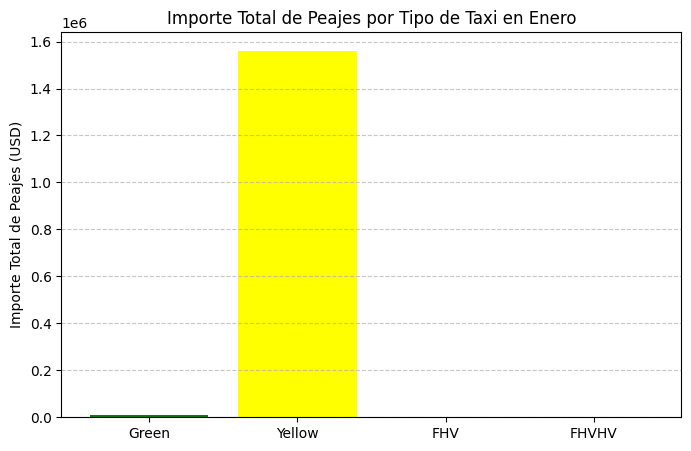

In [32]:
## Calculamos el total de peajes para cada tipo de taxi
green_tolls = green["tolls_amount"].sum()
yellow_tolls = yellow["tolls_amount"].sum()

## FHV y FHVHV no tienen columna de peajes, así que su total es 0
fhv_tolls = 0
fhvhv_tolls = 0

## Creamos un DataFrame con los totales de peajes
tolls_df = pl.DataFrame({
    "taxi_type": ["Green", "Yellow", "FHV", "FHVHV"],
    "total_tolls": [green_tolls, yellow_tolls, fhv_tolls, fhvhv_tolls]
})

## Graficams: barras
plt.figure(figsize=(8, 5))
plt.bar(tolls_df["taxi_type"], tolls_df["total_tolls"], color=["green", "yellow", "gray", "blue"])
plt.ylabel("Importe Total de Peajes (USD)")
plt.title("Importe Total de Peajes por Tipo de Taxi en Enero")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

In [42]:

## Seleccionamos las columnas relevantes para cada DataFrame
green = green.select(["PickupDateTime", "taxi_type"])
yellow = yellow.select(["PickupDateTime", "taxi_type"])
fhv = fhv.select(["PickupDateTime", "taxi_type"])
fhvhv = fhvhv.select(["PickupDateTime", "taxi_type"])

## Concatenamos los DataFrames
all_taxis = pl.concat([green, yellow, fhv, fhvhv])

## Extraemos hour y day
all_taxis = all_taxis.with_columns([
    pl.col("PickupDateTime").dt.hour().alias("hour"),
    pl.col("PickupDateTime").dt.day().alias("day")
])


C:\Users\A S U S\AppData\Local\Temp\ipykernel_16012\1716099165.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("num_trips")


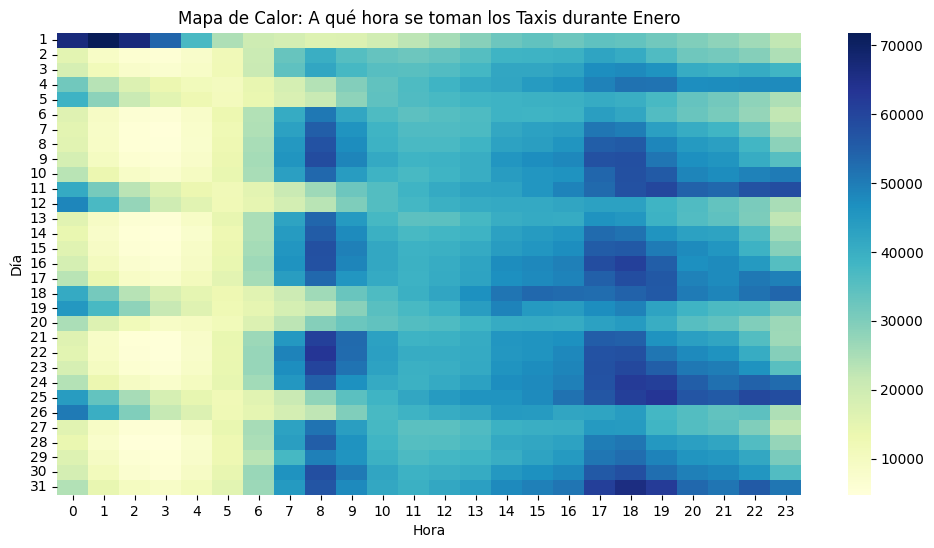

In [44]:
## Hacemos el heat map
heatmap_data = all_taxis.group_by(["day", "hour"]).agg(
    pl.count().alias("num_trips")
).sort(["day", "hour"])

df_heatmap = heatmap_data.to_pandas().pivot(index="day", columns="hour", values="num_trips").fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap="YlGnBu", annot=False)
plt.title("Mapa de Calor: A qué hora se toman los Taxis durante Enero")
plt.xlabel("Hora")
plt.ylabel("Día")
plt.show()

### Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

C:\Users\A S U S\AppData\Local\Temp\ipykernel_16012\2922587450.py:15: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("rides")


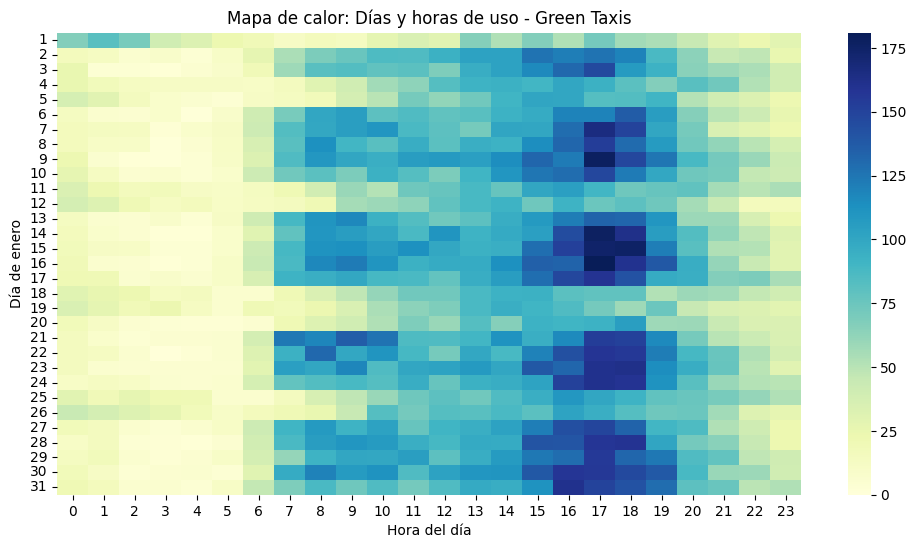

C:\Users\A S U S\AppData\Local\Temp\ipykernel_16012\2922587450.py:15: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("rides")


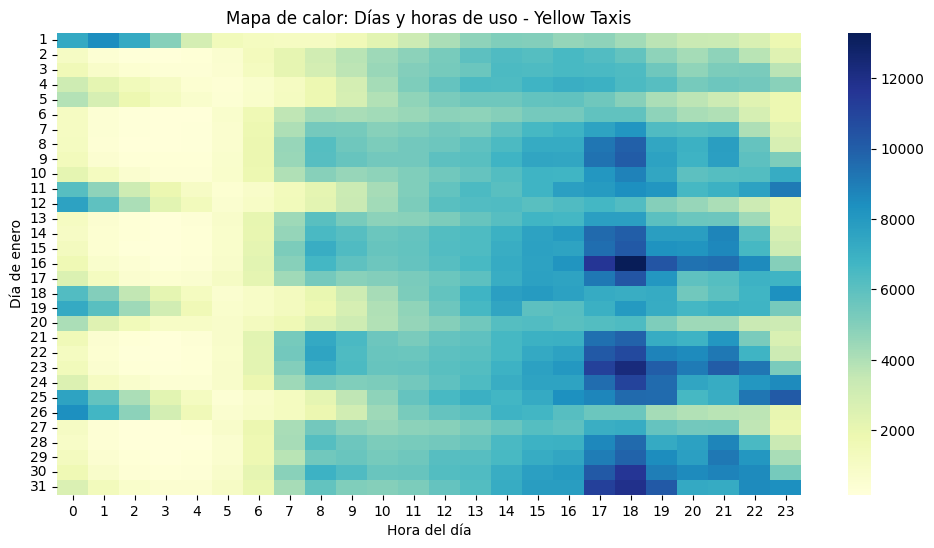

C:\Users\A S U S\AppData\Local\Temp\ipykernel_16012\2922587450.py:15: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("rides")


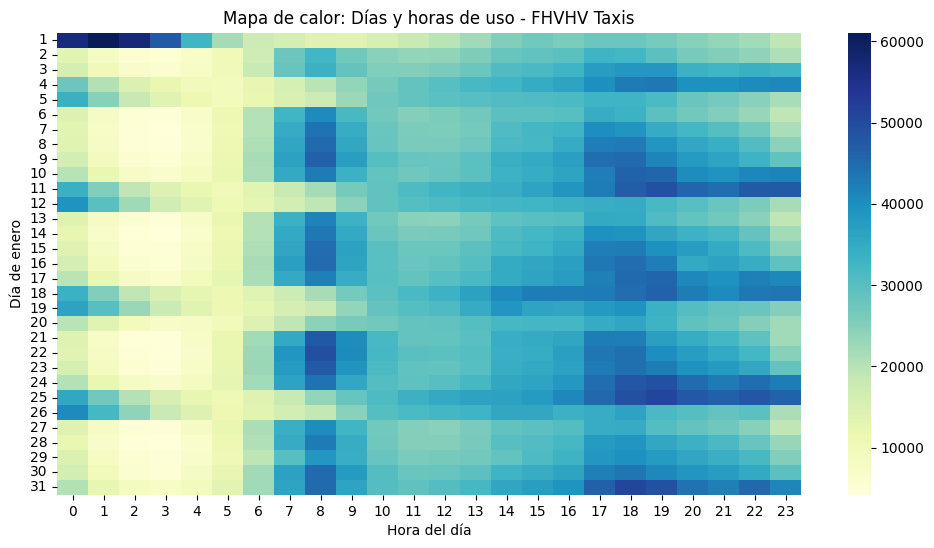

C:\Users\A S U S\AppData\Local\Temp\ipykernel_16012\2922587450.py:15: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("rides")


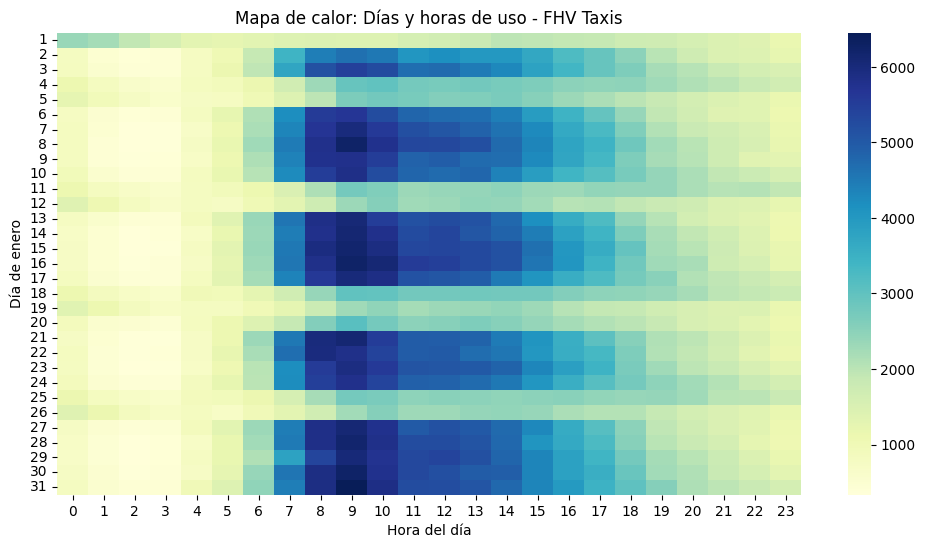

In [47]:
## Creamos una lista de DataFrames y nombres de taxi
taxi_dfs = [green, yellow, fhvhv, fhv]
taxi_names = ["Green", "Yellow", "FHVHV", "FHV"]

for df, name in zip(taxi_dfs, taxi_names):

    ## Extraemos hora y día
    df = df.with_columns([
        pl.col("PickupDateTime").dt.hour().alias("hour"),
        pl.col("PickupDateTime").dt.day().alias("day")
    ])

    ## Agrupamos
    grouped = df.group_by(["day", "hour"]).agg(
        pl.count().alias("rides")
    ).sort(["day", "hour"])

    ## Convertimos a Pandas para el mapa de calor
    grouped_pd = grouped.to_pandas().pivot(index="day", columns="hour", values="rides").fillna(0)

    ## Creamos el mapa de calor
    plt.figure(figsize=(12, 6))
    sns.heatmap(grouped_pd, cmap="YlGnBu")
    plt.title(f"Mapa de calor: Días y horas de uso - {name} Taxis")
    plt.xlabel("Hora del día")
    plt.ylabel("Día de enero")
    plt.show()
